In [3]:
# Data Cleansing Activities

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
loan = pd.read_csv('loan.csv',low_memory=False)
loan_df = pd.DataFrame(loan)
loan_df_small =loan_df[['emp_length','funded_amnt']]

print("****Values Before Cleanup***")
print(loan_df[['issue_d','emp_title','total_pymnt']].head(10))

# Column converted to Day Month and Year format
loan_df['issue_d']=pd.to_datetime(loan_df['issue_d'],format="%b-%y") 

# Column converte to Day Month and Year format
loan_df['earliest_cr_line']=pd.to_datetime(loan_df['earliest_cr_line'],format="%b-%y")

# Numeric value rounded to 2 decimals
loan_df['total_pymnt']=loan_df['total_pymnt'].round(2) 

# Null values replaced with Not Available
loan_df['emp_title'] =loan_df['emp_title'].fillna("Not Available")

print("****Values After Cleanup***")
print(loan_df[['issue_d','emp_title','total_pymnt']].head(10))


****Values Before Cleanup***
  issue_d                  emp_title   total_pymnt
0  Dec-11                        NaN   5863.155187
1  Dec-11                      Ryder   1008.710000
2  Dec-11                        NaN   3005.666844
3  Dec-11        AIR RESOURCES BOARD  12231.890000
4  Dec-11   University Medical Group   3513.330000
5  Dec-11       Veolia Transportaton   5632.210000
6  Dec-11  Southern Star Photography  10110.840000
7  Dec-11            MKC Accounting    3939.135294
8  Dec-11                        NaN    646.020000
9  Dec-11                  Starbucks   1476.190000
****Values After Cleanup***
     issue_d                  emp_title  total_pymnt
0 2011-12-01              Not Available      5863.16
1 2011-12-01                      Ryder      1008.71
2 2011-12-01              Not Available      3005.67
3 2011-12-01        AIR RESOURCES BOARD     12231.89
4 2011-12-01   University Medical Group      3513.33
5 2011-12-01       Veolia Transportaton      5632.21
6 2011-12-0

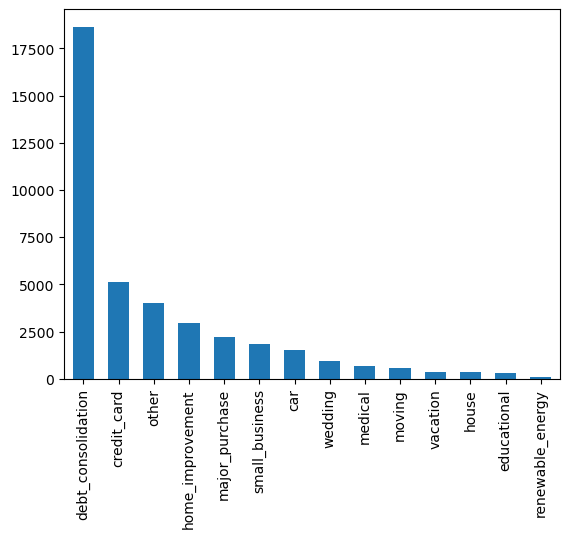

In [34]:
# USE CASE1 Categorical Univariate Analysis on the Loan Purpose.
# Results shows that maximum people take loan for debt consoloidation followed by credit card payment which is concern as there
# are higher chances of people not paying the loan amount.
loan_df['purpose'].value_counts(sort=True).plot(kind='bar',width=0.6)
plt.show()

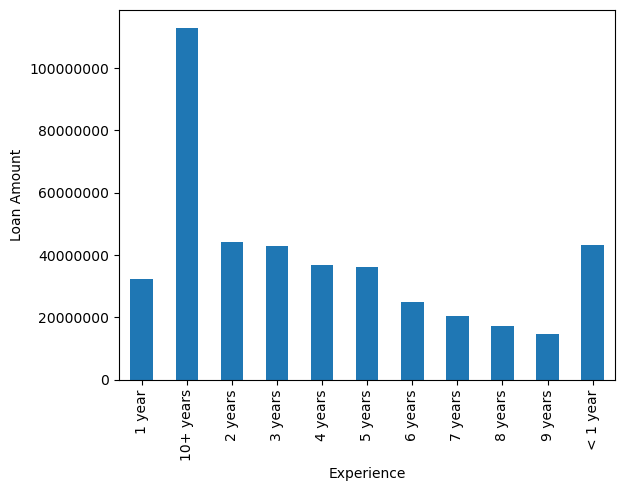

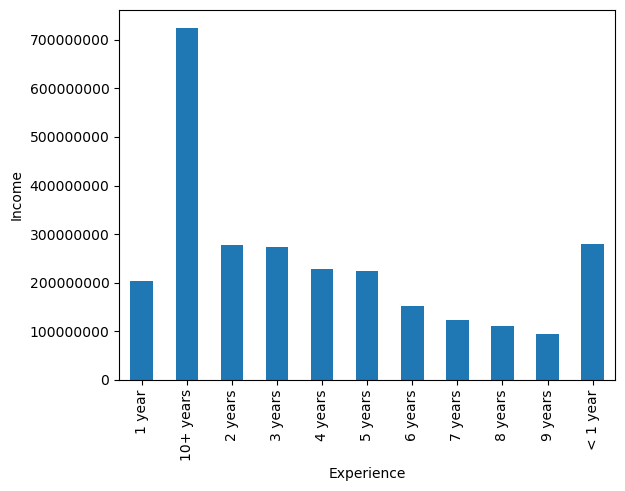

In [57]:
# USE CASE2 Categorical Univariate Analysis on the Income Distribution and the loan amount per Borrower Experience.
# Rsults show that people with 10+ experience has more salary and the loan amount as compared to people with 9years and there are few people 
# having 9years experience. Check both Graphs
loan_df_small =loan_df[['emp_length','funded_amnt']]
loan_small_group=loan_df_small.groupby('emp_length')['funded_amnt'].sum()
loan_small_group.plot(kind ='bar', x ='emp_length', y = 'funded_amnt')
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.xlabel("Experience")
plt.ylabel("Loan Amount")
plt.show()

loan_df_small =loan_df[['emp_length','annual_inc']]
loan_small_group=loan_df_small.groupby('emp_length')['annual_inc'].sum()
loan_small_group.plot(kind ='bar', x ='emp_length', y = 'annual_inc')
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.xlabel("Experience")
plt.ylabel("Income")
plt.show()

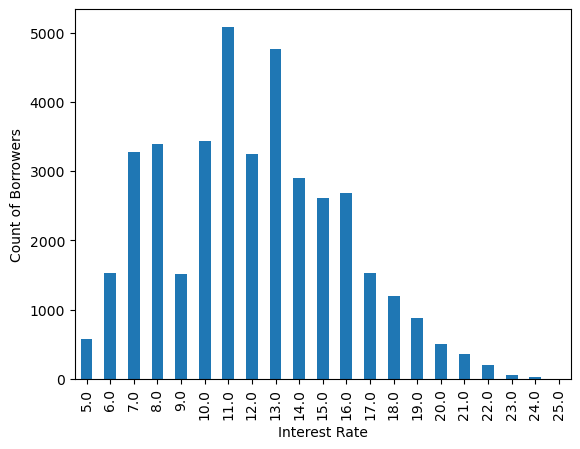

In [33]:
#Use Case 3 Categorical Univariate Quantative Analysis
# Results show that most frequent interest rate paid is in 11% category and there are few borrowers 
# which pay interest more than 16%. Bank can focus on increasing such customers 

loan_df['int_rate_round'] = loan_df['int_rate'].str.rstrip("%").astype(float).round()
loan_int_rate_group=loan_df.groupby('int_rate_round')['int_rate_round'].count()
loan_int_rate_group.columns=['int_rate_round','count_values']
loan_int_rate_group.plot(kind ='bar', x ='int_rate', y = 'count_values')
plt.xlabel("Interest Rate")
plt.ylabel("Count of Borrowers")
plt.show()



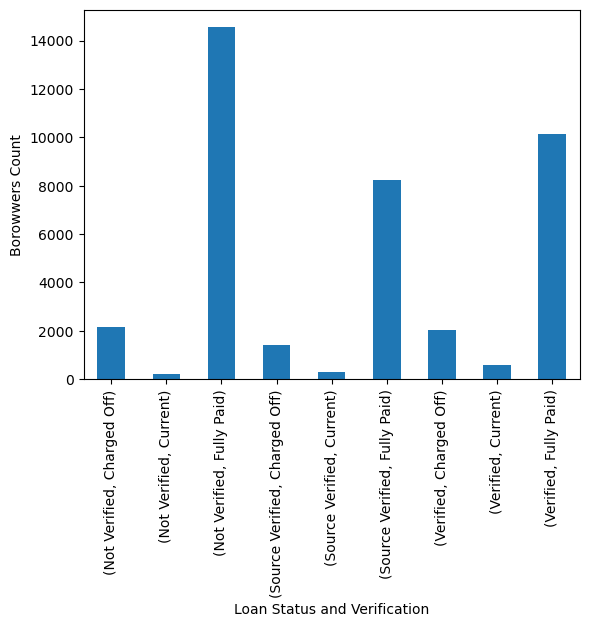

In [41]:
# Segmented Univariate Analysis Use Case 1
# Below graph shows the Loan Status based on the Income Verification Status.
# Borrowers Count who defaulted the loan are more in numbers in "Not Verified" category as compared to the ones who are in "Source Verified Category"
# We will see the amount which is funded to such categories in Use Case2 
loan_group_UC1=loan_df.groupby(['verification_status','loan_status'])['loan_status'].count()

loan_group_UC1.columns=['verification_status','loan_status']

loan_group_UC1.plot(kind ='bar', x =['loan_status','verification_status'])
plt.xlabel("Loan Status and Verification")
plt.ylabel("Borowwers Count")
plt.show()

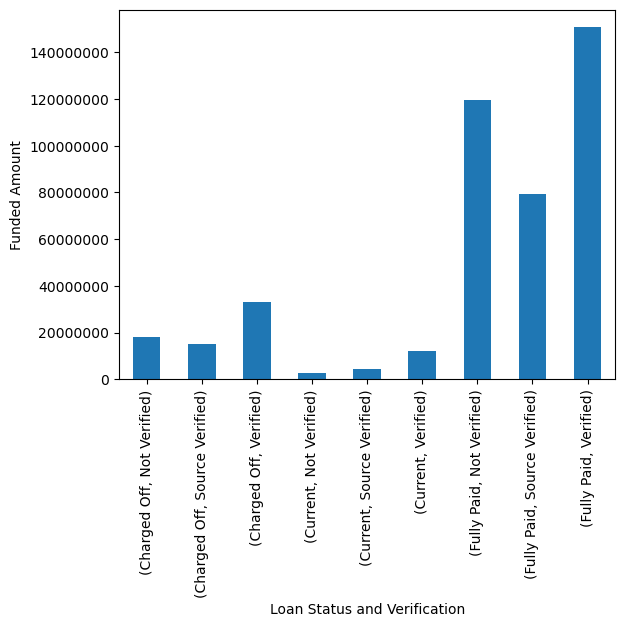

In [44]:
# Segmented Univariate Analysis Use Case 2
# Below graph shows the Funded Amount based on the Income Verification Status and Loan Status.
# Amount funded to the Borrowers who are defaulters or charged off is less compared to the ones who have fully paid the loan but
#if we compare the defaulters based on the Verification Status I see the verified ones have more share of the funded amount 
#which is a case of concern

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
loan = pd.read_csv('loan.csv',low_memory=False)
loan_df = pd.DataFrame(loan)

loan_group_UC2=loan_df.groupby(['loan_status','verification_status'])['funded_amnt'].sum()
loan_group_UC2.plot(kind ='bar', x =['verification_status','loan_status'])
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.xlabel("Loan Status and Verification")
plt.ylabel("Funded Amount")
plt.show()

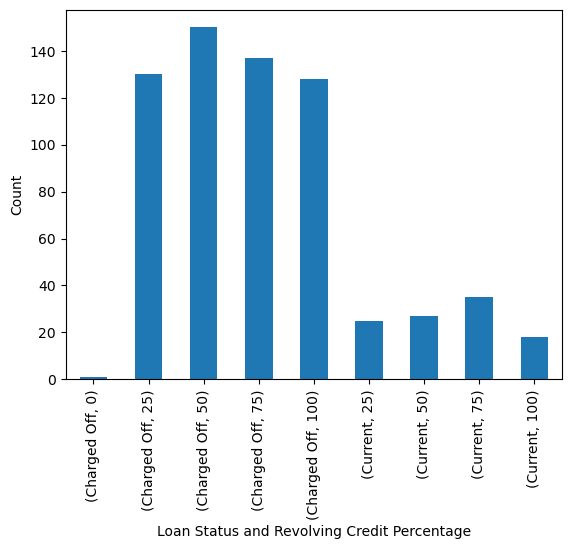

In [52]:
# Derived Metrics
# Description - Below graph shows the Borrowers who are either Charged Off or Current and have cases of Delinquency in past 2yrs
#               and Revolving Credit percentage. 
# So case having Higher Revolving Credit percentage has more probability of Defaulting the Loan


loan = pd.read_csv('loan.csv',low_memory=False)
loan_df = pd.DataFrame(loan)
loan_df['revol_util'] = loan_df['revol_util'].str.rstrip("%").astype(float).round()
loan_df= loan_df[((loan_df['loan_status'] == 'Charged Off') | (loan_df['loan_status'] == 'Current')) & loan_df['delinq_2yrs'] >0 ]


conditions = [
    (loan_df['revol_util'] <=25),
    (loan_df['revol_util'] > 25) & (loan_df['revol_util'] <= 50),
    (loan_df['revol_util'] > 50) & (loan_df['revol_util'] <= 75),
    (loan_df['revol_util'] > 75) & (loan_df['revol_util'] <= 100)
    ]

values = [25,50,75,100]
loan_df['revol_util_bf'] = np.select(conditions, values)

loan_derived=loan_df.groupby(['loan_status','revol_util_bf'])['revol_util_bf'].count()
loan_derived.columns=['loan_status','revol_util']
loan_derived.plot(kind ='bar', x =['loan_status','revol_util'])
plt.xlabel("Loan Status and Revolving Credit Percentage")
plt.ylabel("Count")
plt.show()

In [53]:
# Bivariate Analysis using Correlation Metric 
# Finding 1 - Loan term has correlation with the Loan status. People taking loan for small tenure default less
# Finding 2 - Loan Amount and Funded amount is 0.96 corelated which means people are getting most of the requested loan amount irespective of the verification status 


import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
loan = pd.read_csv('loan.csv',low_memory=False)
loan_df = pd.DataFrame(loan)
loan_df['revol_util'] = loan_df['revol_util'].str.rstrip("%").astype(float).round()
loan_df_cm= loan_df[['annual_inc','loan_amnt','loan_status','revol_util','funded_amnt','term','int_rate','grade','sub_grade','home_ownership','verification_status','delinq_2yrs']]
loan_df_cm=loan_df_cm.apply(lambda x: x.factorize()[0]).corr()
#loan_df_cm
corr =loan_df_cm.corr()
corr.style.background_gradient(cmap='coolwarm')
#plt.matshow(loan_df_cm.corr())
#plt.show()


,annual_inc,loan_amnt,loan_status,revol_util,funded_amnt,term,int_rate,grade,sub_grade,home_ownership,verification_status,delinq_2yrs
annual_inc,1.000000,-0.127072,-0.237083,-0.063723,-0.132363,-0.258064,0.299424,-0.192207,-0.213393,-0.113627,0.011253,-0.133041
loan_amnt,-0.127072,1.000000,-0.044404,-0.170432,0.962377,0.022969,-0.194426,-0.162214,-0.152454,-0.096121,-0.196127,-0.185135
loan_status,-0.237083,-0.044404,1.000000,-0.195929,-0.025083,0.525287,-0.437441,0.105692,0.090859,-0.058387,-0.347148,-0.099383
revol_util,-0.063723,-0.170432,-0.195929,1.000000,-0.171517,-0.193630,-0.023565,-0.261117,-0.209867,-0.039297,0.025947,-0.089418
funded_amnt,-0.132363,0.962377,-0.025083,-0.171517,1.000000,0.092010,-0.200015,-0.151553,-0.134775,-0.075371,-0.258024,-0.193788
term,-0.258064,0.022969,0.525287,-0.193630,0.092010,1.000000,-0.589999,0.303429,0.331092,0.104786,-0.622106,-0.107963
int_rate,0.299424,-0.194426,-0.437441,-0.023565,-0.200015,-0.589999,1.000000,-0.187915,-0.264025,-0.231301,0.382576,-0.067769
grade,-0.192207,-0.162214,0.105692,-0.261117,-0.151553,0.303429,-0.187915,1.000000,0.839214,-0.142884,-0.344126,-0.000986
sub_grade,-0.213393,-0.152454,0.090859,-0.209867,-0.134775,0.331092,-0.264025,0.839214,1.000000,-0.082970,-0.353954,-0.052253
home_ownership,-0.113627,-0.096121,-0.058387,-0.039297,-0.075371,0.104786,-0.231301,-0.142884,-0.082970,1.000000,-0.232797,-0.073842
